# Autolib Research

Autolib is an electric car sharing service company that specializes in renting out Electric Cars. They need research done to test a claim that the number of blue cars taken on the weekend is more than the number of blue cars taken on weekdays. This information is to help them make a more informed decision regarding whether to keep the stations open for 24hours during the weekdays like they do during weekends.   


Hypothesis :

Ho = There is no difference between the number of blue cars taken over the weekend compared to the weekdays.

H1 = The number of blue cars taken on the weekends is more compared to the number of blue cars taken on weekdays 

# Data Preparation and Cleaning

importing the Libraries needed for the research and reading the data

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [180]:
autolib_df = pd.read_csv('autolib_daily_events_postal_code.csv')
autolib_df.shape

(16085, 13)

In [181]:
autolib_df

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [182]:
autolib_df.shape

(16085, 13)

Data Validity


In [183]:
#Dropping daily data points since we will not be using it for this research at all
autolib_df.drop('n_daily_data_points', inplace=True, axis=1)

In [184]:
autolib_df.columns

Index(['Postal code', 'date', 'dayOfWeek', 'day_type', 'BlueCars_taken_sum',
       'BlueCars_returned_sum', 'Utilib_taken_sum', 'Utilib_returned_sum',
       'Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum',
       'Slots_taken_sum'],
      dtype='object')

1. Data Consistency

In [185]:
#Dropping Duplicates
autolib_df = autolib_df.drop_duplicates()

In [186]:
autolib_df.shape

(16085, 12)

Data Completeness

In [187]:
#Checking for and handling Missing Values
autolib_df.isnull().sum()/len(autolib_df['Postal code'])

Postal code               0.0
date                      0.0
dayOfWeek                 0.0
day_type                  0.0
BlueCars_taken_sum        0.0
BlueCars_returned_sum     0.0
Utilib_taken_sum          0.0
Utilib_returned_sum       0.0
Utilib_14_taken_sum       0.0
Utilib_14_returned_sum    0.0
Slots_freed_sum           0.0
Slots_taken_sum           0.0
dtype: float64

The data seems Clean. No Duplicates or Missing Values found

In [188]:
autolib_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16085 entries, 0 to 16084
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   dayOfWeek               16085 non-null  int64 
 3   day_type                16085 non-null  object
 4   BlueCars_taken_sum      16085 non-null  int64 
 5   BlueCars_returned_sum   16085 non-null  int64 
 6   Utilib_taken_sum        16085 non-null  int64 
 7   Utilib_returned_sum     16085 non-null  int64 
 8   Utilib_14_taken_sum     16085 non-null  int64 
 9   Utilib_14_returned_sum  16085 non-null  int64 
 10  Slots_freed_sum         16085 non-null  int64 
 11  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 1.6+ MB


Date column seems to be saved as an object instead of a Datetime. 

In [189]:
#Converting date column to Datetime
autolib_df['date']= pd.to_datetime(autolib_df['date'])

In [190]:
autolib_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16085 entries, 0 to 16084
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Postal code             16085 non-null  int64         
 1   date                    16085 non-null  datetime64[ns]
 2   dayOfWeek               16085 non-null  int64         
 3   day_type                16085 non-null  object        
 4   BlueCars_taken_sum      16085 non-null  int64         
 5   BlueCars_returned_sum   16085 non-null  int64         
 6   Utilib_taken_sum        16085 non-null  int64         
 7   Utilib_returned_sum     16085 non-null  int64         
 8   Utilib_14_taken_sum     16085 non-null  int64         
 9   Utilib_14_returned_sum  16085 non-null  int64         
 10  Slots_freed_sum         16085 non-null  int64         
 11  Slots_taken_sum         16085 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(1)
mem

In [191]:
autolib_df['date'].max()

Timestamp('2018-06-19 00:00:00')

In [192]:
autolib_df['date'].min()

Timestamp('2018-01-01 00:00:00')

This investigation is being done for data between 1st January 2018 and 19th June 2018

Checking for outliers

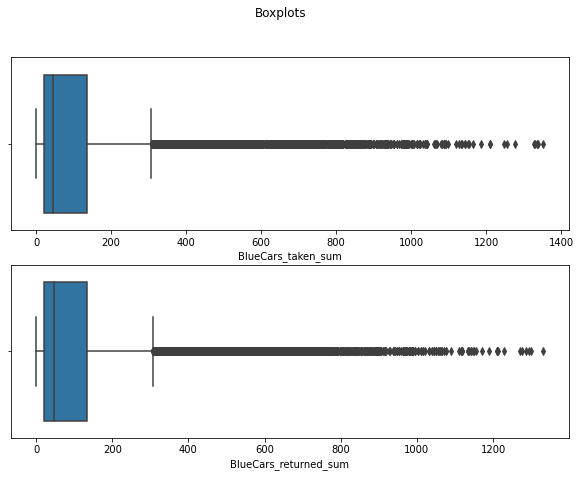

In [193]:
# Checking for Outliers
fig, ((ax1, ax2)) = plt.subplots(2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(autolib_df['BlueCars_taken_sum'], ax=ax1)
sns.boxplot(autolib_df['BlueCars_returned_sum'], ax=ax2)
plt.show()

In [194]:
#Creating a threshold to determine outliers.
Maximum_threshold = autolib_df['BlueCars_taken_sum'].quantile(0.95)
Minimum_threshold = autolib_df['BlueCars_taken_sum'].quantile(0.05)

In [195]:

#Removing Outliers
autolib_df = autolib_df[(autolib_df['BlueCars_taken_sum']< Maximum_threshold) & (autolib_df['BlueCars_taken_sum']< Maximum_threshold)]

In [196]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


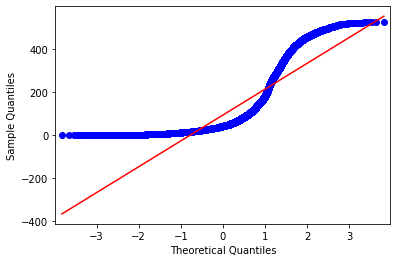

In [197]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
data = autolib_df['BlueCars_taken_sum']
qqplot(data, line='s')
pyplot.show()

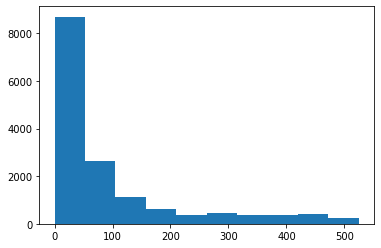

In [198]:
pyplot.hist(data)
pyplot.show()

In [200]:
autolib_df[autolib_df['BlueCars_taken_sum'] > 300]

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
317,75003,2018-01-06,5,weekend,331,338,9,8,13,16,95,97
324,75003,2018-01-13,5,weekend,380,379,8,8,23,25,83,84
325,75003,2018-01-14,6,weekend,356,359,5,5,20,17,81,83
331,75003,2018-01-20,5,weekend,384,400,8,8,14,14,101,103
332,75003,2018-01-21,6,weekend,313,307,4,4,15,16,86,87
...,...,...,...,...,...,...,...,...,...,...,...,...
5120,92130,2018-05-26,5,weekend,347,347,12,13,15,16,7,7
5126,92130,2018-06-01,4,weekday,302,292,11,11,17,19,5,5
5137,92130,2018-06-12,1,weekday,318,302,3,6,26,23,2,3
5141,92130,2018-06-16,5,weekend,352,342,13,10,12,13,8,8


In [201]:
len(autolib_df[autolib_df['BlueCars_taken_sum'] > 300])/len(autolib_df)*100

9.646596858638743

9.6% of the data is making the data become very skewed to the right.

Dropping this data in order to ensure that it is less skewed before running the T-Tests.

In [202]:
autolib_df = autolib_df[autolib_df['BlueCars_taken_sum'] < 300]

In [203]:
autolib_df

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,2018-01-01,0,weekday,110,103,3,2,10,9,22,20
1,75001,2018-01-02,1,weekday,98,94,1,1,8,8,23,22
2,75001,2018-01-03,2,weekday,138,139,0,0,2,2,27,27
3,75001,2018-01-04,3,weekday,104,104,2,2,9,8,25,21
4,75001,2018-01-05,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,2018-06-15,4,weekday,15,10,0,0,2,3,0,0
16081,95880,2018-06-16,5,weekend,19,19,0,0,2,1,0,0
16082,95880,2018-06-17,6,weekend,33,35,1,1,0,0,0,0
16083,95880,2018-06-18,0,weekday,11,14,3,5,2,2,0,0


Checking the type of Distribution the column now has

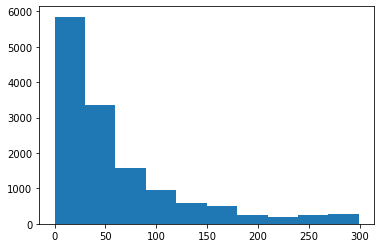

In [204]:
data = autolib_df['BlueCars_taken_sum']
pyplot.hist(data)
pyplot.show()

The sample is not Normally distributed but since the sample size is more than 30 it is safe to use the T-test since T procedures are very robust even if the data isnt normally distributed

# Data Analysis

Univariate Analysis

In [205]:
autolib_df['day_type'].unique()

array(['weekday', 'weekend'], dtype=object)

In [206]:
autolib_df.head(2)

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,2018-01-01,0,weekday,110,103,3,2,10,9,22,20
1,75001,2018-01-02,1,weekday,98,94,1,1,8,8,23,22


Weekdays = 10023
Weekends = 3779
Proportion of Weekdays  = 72.62%
Proportion of Weekends  = 27.38%


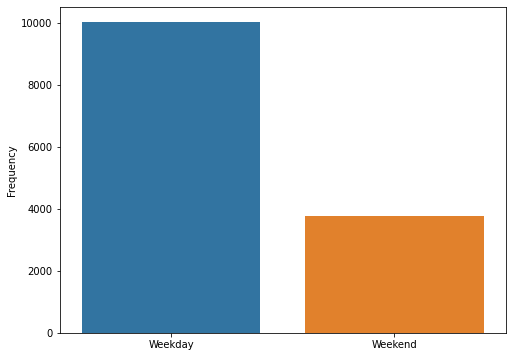

In [207]:
#Number of cars taken during the weekdays vs During the weekends
pos = autolib_df[autolib_df["day_type"] == 'weekday'].shape[0]
neg = autolib_df[autolib_df["day_type"] == 'weekend'].shape[0]
print(f"Weekdays = {pos}")
print(f"Weekends = {neg}")
print(f"Proportion of Weekdays  = {(pos / len(autolib_df['day_type'])) * 100:.2f}%")
print(f"Proportion of Weekends  = {(neg / len(autolib_df['day_type'])) * 100:.2f}%")                                                      
plt.figure(figsize=(8, 6))
sns.countplot(autolib_df["day_type"])
plt.xticks((0, 1), ["Weekday", "Weekend"])
plt.xlabel("")
plt.ylabel("Frequency")
plt.title("", y=1, fontdict={"fontsize": 20});

It seems like More cars are taken during the weekdays compared to the weekend. We however need to confirm this through statistical tests to make sure that this doens't just happen by chance. 

Bivariate Analysis

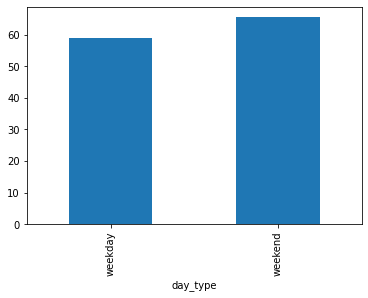

In [208]:
#average Number of bluecars taken during the weekdays vs During the weekends
autolib_df.groupby('day_type')['BlueCars_taken_sum'].mean().plot(kind='bar')

From this result, it seems like MOre blue cars are taken on weekends compared to weekdays on average. We require a statistical test to prove this beyond any doubt

# Hypothesis Testing

Hypothesis :
 
Ho = There is no difference between the number of blue cars taken over the weekend compared to the weekdays.

H1 = The number of blue cars taken on the weekends is more to the number of blue cars taken on weekdays.  

with a 0.05 Significance Level(0.95 Confidence Level)

First lets create two separate dataframes for weekends and for weekdays

In [209]:
Weekend_df = autolib_df[autolib_df['day_type'] == 'weekend']
weekday_df = autolib_df[autolib_df['day_type'] == 'weekday']

In [210]:
from scipy.stats import *
stat,p_value = ttest_ind(Weekend_df['BlueCars_taken_sum'],weekday_df['BlueCars_taken_sum'],equal_var = True)

Using A significant Level of 0.05,
if the Pvalue is less than 0.05 we will reject the null Hypothesis and if it is more than 0.05 we will accept the null Hypothesis. 

In [213]:
print("P-Value : ",p_value)
print("T statistic : ",stat)
if p_value < 0.05:
    print("Reject the Null Hypothesis. There is a significant difference between the number of blue cars taken over the weekend compared to the weekdays ")
elif p_value >0.05 :
    print("Accept the Null Hypothesis. There is no significant difference between the number of blue cars taken over the weekend compared to the weekdays. Fot this reason the stations should stay open 24 hours during the weekend in order to maximize Profits")



P-Value :  5.1544029610826144e-08
T statistic :  5.448926289875178
Reject the Null Hypothesis. There is a significant difference between the number of blue cars taken over the weekend compared to the weekdays 
